In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('UberDataset.csv')
df = data.copy()
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
for col in df.columns:# This for loop checks for the % of the Missing values
        Missing = np.mean(df[col].isnull())
        print('{}-{}%'.format(col, round(Missing * 100)))

START_DATE-0%
END_DATE-0%
CATEGORY-0%
START-0%
STOP-0%
MILES-0%
PURPOSE-44%


In [7]:
df['PURPOSE'] = df['PURPOSE'].fillna('Unknown')
df.columns = df.columns.str.lower()
df.head()

,start_date,end_date,category,start,stop,miles,purpose
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
df['start_date'] = pd.to_datetime(df['start_date'], errors = 'coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors = 'coerce')
'''
    #Splits the date and time from the start date which has both date and time elements
    #Also makes two separate columns for both elements
    #Do this after changing start date and the end date to date_time format, otherwise it will give error
'''
df['StartDate'] = pd.DatetimeIndex(df['start_date']).date
df['start_time'] = pd.DatetimeIndex(df['start_date']).hour
df.head() 

,start_date,end_date,category,start,stop,miles,purpose,StartDate,start_time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [10]:
df.drop_duplicates(inplace = True)
df['day_night'] = pd.cut(x = df['start_time'], bins = [0, 10, 15, 19, 24], labels = ['Day', 'Noon', 'Evening', 'Night'])
df.dropna(inplace = True)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

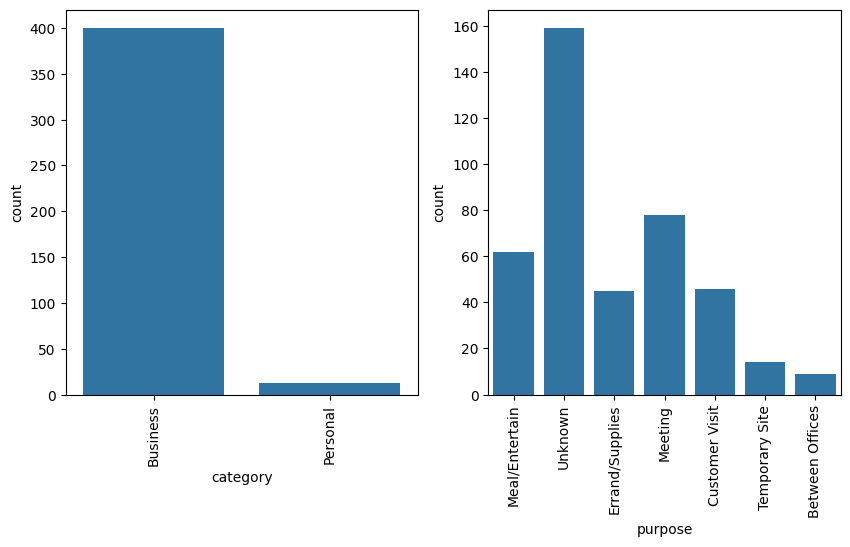

In [11]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1) #Countplot for category column
sns.countplot(x = 'category', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)# Countplot for purpose column
sns.countplot(x = 'purpose', data= df)
plt.xticks(rotation = 90)

([0, 1, 2, 3],
 [Text(0, 0, 'Day'),
  Text(1, 0, 'Noon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

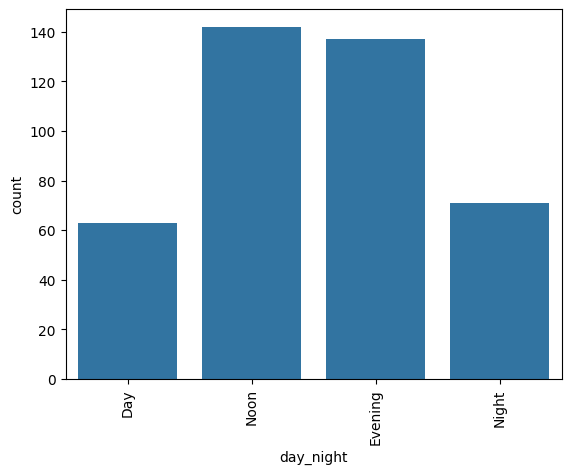

In [12]:
sns.countplot(x = 'day_night', data= df)# Countplot for the day_night column
plt.xticks(rotation = 90)
   

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Unknown'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

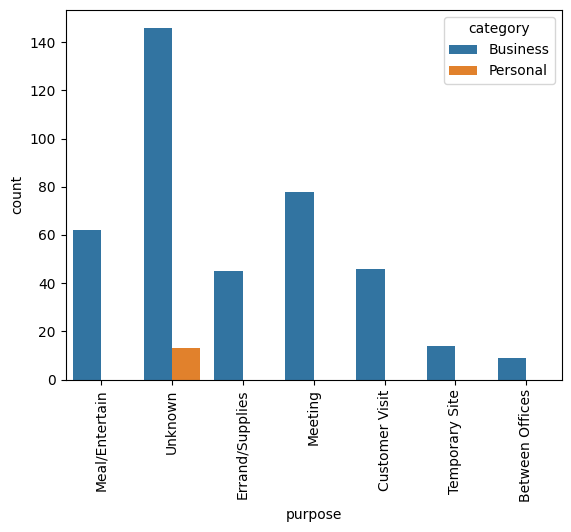

In [13]:
sns.countplot(data = df, x = 'purpose', hue = 'category')
plt.xticks(rotation = 90)